# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

In [1]:
from google.colab import files
uploaded = files.upload()   #uploading an image
filename = list(uploaded.keys())[0]


Saving flowers.avif to flowers.avif


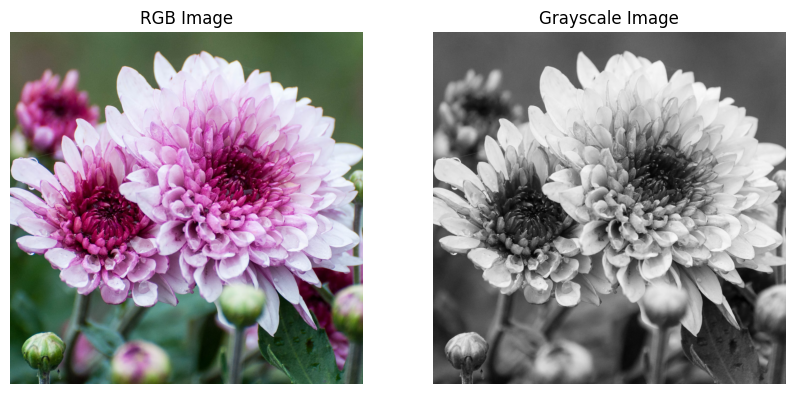

Shape of original BGR image: (2848, 2852, 3)
Shape of RGB image        : (2848, 2852, 3)
Shape of grayscale image  : (2848, 2852)
RGB pixel at [0,0]      = [80 89 62]
Grayscale pixel at [0,0]= 83
Pixel [0,0]  RGB = [80 89 62]   Gray = 83
Pixel [1,1]  RGB = [78 87 60]   Gray = 81
Pixel [2,2]  RGB = [78 87 60]   Gray = 81
Pixel [3,3]  RGB = [87 96 69]   Gray = 90
Pixel [4,4]  RGB = [ 94 103  76]   Gray = 97


In [2]:
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import numpy as np

bgr_img = cv2.imread(filename) # open CV loads images as BGR

rgb_img=np.zeros_like(bgr_img)# Create an empty array with same shape

# Manual channel mapping
rgb_img[:,:,0] = bgr_img[:,:,2]   # R
rgb_img[:,:,1] = bgr_img[:,:,1]   # G
rgb_img[:,:,2] = bgr_img[:,:,0]   # B

#now will convert rgb to grayscale
# we will use the luminance formula to solve
#Gray = 0.299R + 0.587G + 0.114B
R = rgb_img[:,:,0]
G = rgb_img[:,:,1]
B = rgb_img[:,:,2]

gray_img = (0.299*R + 0.587*G + 0.114*B).astype('uint8')

# Display the RGB and grayscale images

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(rgb_img)
plt.title('RGB Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray_img, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.show()


#we will print array shapes

print("Shape of original BGR image:", bgr_img.shape)
print("Shape of RGB image        :", rgb_img.shape)
print("Shape of grayscale image  :", gray_img.shape)

#print some pixcel values

print("RGB pixel at [0,0]      =", rgb_img[0,0])   # 3 values (R,G,B)
print("Grayscale pixel at [0,0]=", gray_img[0,0])  # 1 intensity value

for i in range(5):
    print(f"Pixel [{i},{i}]  RGB = {rgb_img[i,i]}   Gray = {gray_img[i,i]}") #some more comparisons




## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

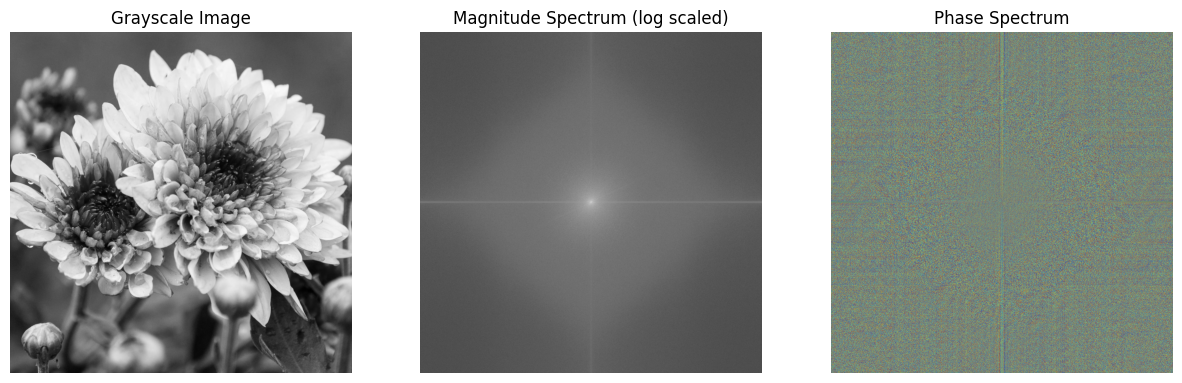

In [5]:
# 1. Compute 2D FFT of grayscale image
f = np.fft.fft2(gray_img)

# 2. Shift zero-frequency component to the center
fshift = np.fft.fftshift(f)

# Magnitude = sqrt( real^2 + imag^2 )
magnitude = np.abs(fshift)

# Phase = angle of the complex number
phase = np.angle(fshift)

# Magnitude spectrum for visualization (log scale)
magnitude_spectrum = np.log(1 + magnitude)


plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(gray_img, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Magnitude Spectrum (log scaled)")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(phase, cmap='jet')
plt.title("Phase Spectrum")
plt.axis('off')

plt.show()

## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

In [8]:
# create a ciruclar low pass mask function
def mask_lpf(shape, radius):

    rows, cols = shape               # unpack shape
    center_row, center_col = rows//2, cols//2

    # Empty mask of 0s
    mask = np.zeros((rows, cols), dtype=np.float32)

    for i in range(rows):
        for j in range(cols):
            dist = np.sqrt((i - center_row)**2 + (j - center_col)**2)
            if dist <= radius:
                mask[i, j] = 1       # pass low frequencies

    return mask


#appply mask
def reconstruct(fshift,mask):
  filtered=fshift*mask   #apply the filter on image
  unshift= np.fft.ifftshift(filtered)     # Shift the image back from frequnecy domain to spatial domain
  img_back=np.fft.ifft2(unshift)          #inverse the FFT

  img_back = np.real(img_back)              # discard tiny imag values
  img_back = np.clip(img_back, 0, 255)      # safe range
  return img_back.astype(np.uint8)


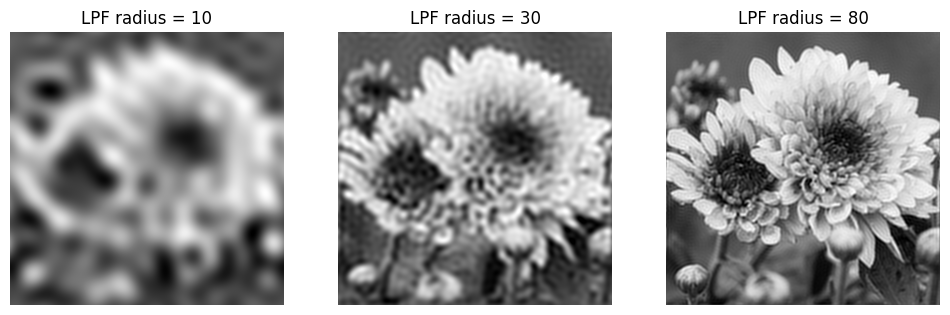

In [9]:
radii = [10, 30, 80]

plt.figure(figsize=(12,6))

for idx, r in enumerate(radii):
    mask = mask_lpf(gray_img.shape, r)        # create LPF
    out = reconstruct(fshift, mask)       # reconstruct image

    plt.subplot(1, 3, idx+1)
    plt.imshow(out, cmap='gray')
    plt.title(f"LPF radius = {r}")
    plt.axis('off')


    #. A small radius keeps only very low-frequency \ structures it removes finer details (edges, textures) so the reconstructed image looks blurrier.
    #A large radius keeps more frequencies thus preserves more detail and results in less blur.


Text(0.5, 1.0, 'HPF radius = 30')

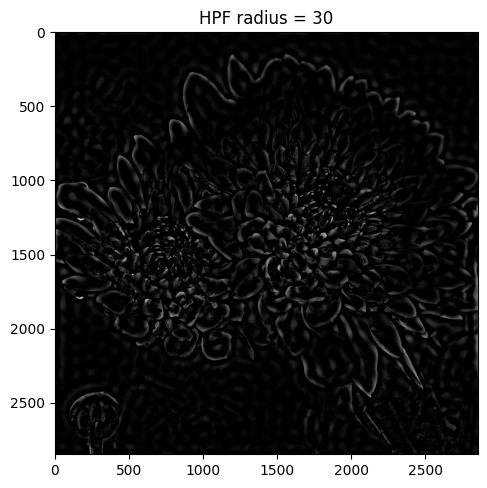

In [10]:

radius=30
lpf=mask_lpf(gray_img.shape,radius) #first we create a low pass filter

hpf=1-lpf

hpf_output=reconstruct(fshift,hpf) #reconstruct the image using a hpf

#now plot the result
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(hpf_output, cmap='gray')
plt.title(f"HPF radius = {radius}")


(np.float64(-0.5), np.float64(2851.5), np.float64(2847.5), np.float64(-0.5))

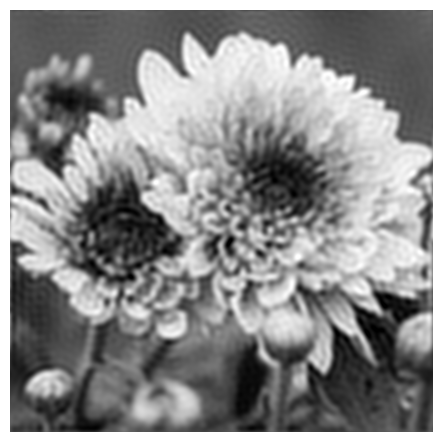

In [11]:
#now will create a square mask of side 50

def square_mask(shape, side):
    rows, cols = shape
    center_row, center_col = rows//2, cols//2
    mask = np.zeros((rows, cols), dtype=np.float32)
    start_row, end_row = center_row - side//2, center_row + side//2
    start_col, end_col = center_col - side//2, center_col + side//2
    mask[start_row:end_row, start_col:end_col] = 1
    return mask
    #created a centered square of size side*side

#apply the square mask

side=50
square_mask=mask_lpf(gray_img.shape,side)
square_output=reconstruct(fshift,square_mask)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(square_output, cmap='gray')
plt.axis('off')



## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

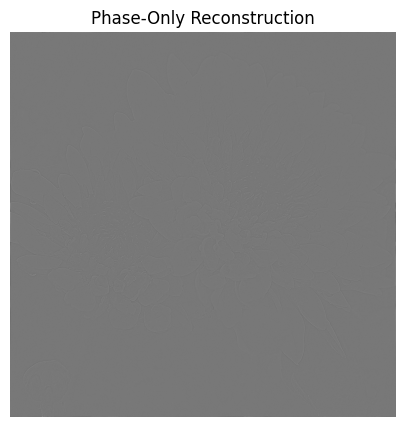

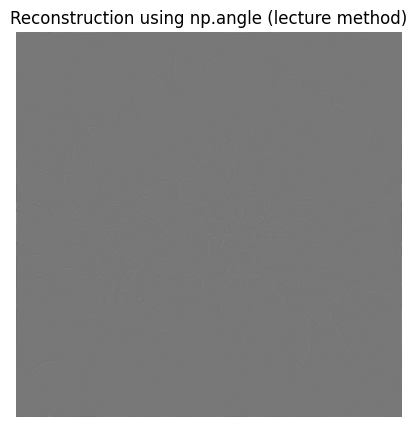

In [14]:
#phase only reconsturction\

# fshift contains:  Complex = Magnitude * e^{j Phase}
# dividing by |fshift| removes magnitude and keeps only e^{j Phase}
phase_only = fshift / (np.abs(fshift) + 1e-8)   # +1e-8 prevents division by zero

# inverse shift will inverse FFT and this will give us a  real image
po_ishift = np.fft.ifftshift(phase_only)
po_img = np.fft.ifft2(po_ishift)
po_img = np.real(po_img)

plt.figure(figsize=(6,5))
plt.imshow(po_img, cmap='gray')
plt.title("Phase-Only Reconstruction")
plt.axis('off')
plt.show()


# This keeps ONLY structure from phase. Phase determines geometry,
# edges, and locations of image features. Magnitude only controls intensity.

# PHASE FROM THE LECTURE: np.angle(fshift)


# angle = the raw phase (radians)
phase_angles = np.angle(fshift)

# To reconstruct, we must convert angle → a complex exponential
# e^{j*angle} = cos(angle) + j sin(angle)
phase_from_angle = np.exp(1j * phase_angles)

# Now do inverse FFT
angle_ishift = np.fft.ifftshift(phase_from_angle)
angle_img = np.fft.ifft2(angle_ishift)
angle_img = np.real(angle_img)

plt.figure(figsize=(6,5))
plt.imshow(angle_img, cmap='gray')
plt.title("Reconstruction using np.angle (lecture method)")
plt.axis('off')
plt.show()

# ---------------------------------------------------------------------
# Difference from "phase_only = fshift / abs(fshift)"
# -----------------------------------------------------
# phase_only = e^{j * phase}  BUT scaled by the exact complex direction
# np.angle gives only the PHASE NUMBER (radians), not the complex exponential.
#
# So np.angle(fshift) CANNOT be directly inverse FFT’ed.
# we  MUST convert: exp(j * angle). Otherwise reconstruction fails

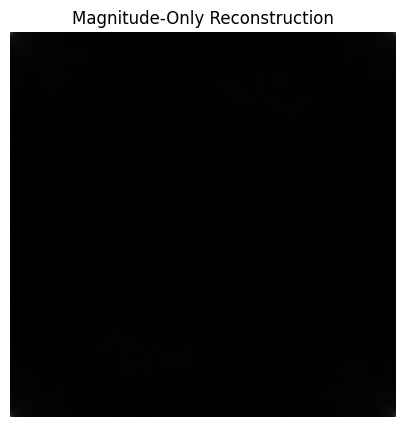

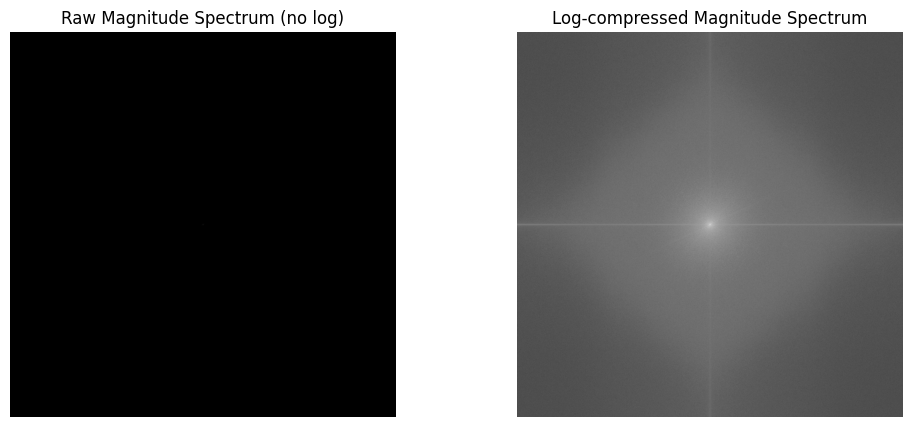

In [15]:
# magnitude-only spectrum
mag_only = np.abs(fshift)

# Note: magnitude is symmetric but contains NO PHASE.
# Without phase, reconstruction loses structure.

# Since magnitude is REAL & NON-COMPLEX, FFT requires complex input.
# We add zero phase: multiply magnitude by exp(j * 0) = 1
mag_ishift = np.fft.ifftshift(mag_only)
mag_img = np.fft.ifft2(mag_ishift)
mag_img = np.real(mag_img)

plt.figure(figsize=(6,5))
plt.imshow(mag_img, cmap='gray')
plt.title("Magnitude-Only Reconstruction")
plt.axis('off')
plt.show()


# Why does this fail to reconstruct structure?
# Because magnitude contains ONLY intensity of each frequency,
# not WHERE or HOW edges are arranged.
# Phase contains the actual spatial information.


# Why magnitude spectrum uses log()


# If we display magnitude directly, high values dominate,
# so lower frequencies disappear.
raw_mag = np.abs(fshift)

# Log compresses large values → spreads out small values
log_mag = np.log(1 + raw_mag)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(raw_mag, cmap='gray')
plt.title("Raw Magnitude Spectrum (no log)")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(log_mag, cmap='gray')
plt.title("Log-compressed Magnitude Spectrum")
plt.axis('off')

plt.show()


# Without log, magnitude spectrum looks almost all black.
# With log, we can clearly see frequency rings & details.

## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

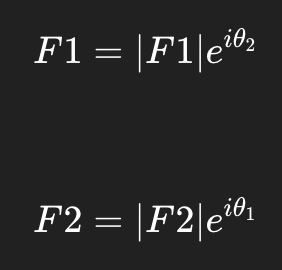

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

In [17]:
from google.colab import files
uploaded=files.upload()
filename1 = list(uploaded.keys())[0]


Saving cat.jpeg to cat.jpeg


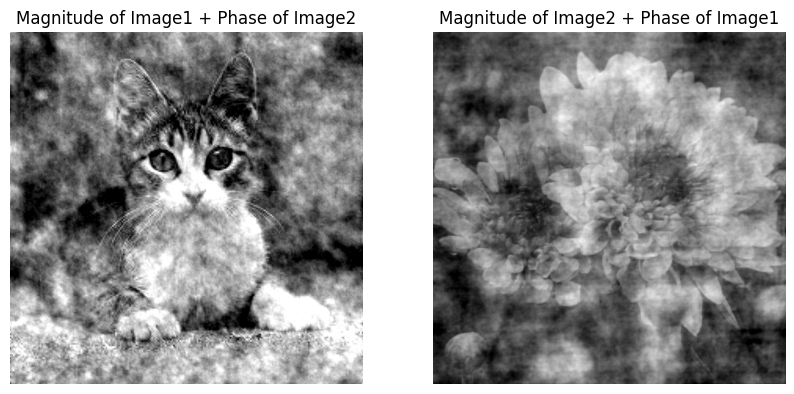

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images in grayscale

img1 = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)  # First image
img2 = cv2.imread(filename1, cv2.IMREAD_GRAYSCALE)  # Replace with second image if available

# Resize img2 to match img1
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))  # (width, height)


# Convert to float for FFT
img1 = img1.astype(np.float32)
img2 = img2.astype(np.float32)


# Compute FFT and shift

f1 = np.fft.fft2(img1)
f2 = np.fft.fft2(img2)

f1_shift = np.fft.fftshift(f1)
f2_shift = np.fft.fftshift(f2)


# Extract magnitude and phase

mag1 = np.abs(f1_shift)
phase1 = np.angle(f1_shift)

mag2 = np.abs(f2_shift)
phase2 = np.angle(f2_shift)


# Swap magnitude and phase

swap1 = mag1 * np.exp(1j * phase2)  # mag1 + phase2
swap2 = mag2 * np.exp(1j * phase1)  # mag2 + phase1


# Inverse FFT to reconstruct images

img_swap1 = np.real(np.fft.ifft2(np.fft.ifftshift(swap1)))
img_swap2 = np.real(np.fft.ifft2(np.fft.ifftshift(swap2)))

# Clip values to valid 0-255 range for display
img_swap1 = np.clip(img_swap1, 0, 255)
img_swap2 = np.clip(img_swap2, 0, 255)


# Display results

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img_swap1, cmap='gray')
plt.title("Magnitude of Image1 + Phase of Image2")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_swap2, cmap='gray')
plt.title("Magnitude of Image2 + Phase of Image1")
plt.axis('off')

plt.show()


# Observation:
# Phase determines structure (edges, layout, overall shape).
# Magnitude determines texture/contrast/intensity.
# Swapped images resemble the **phase source**, not the magnitude source.


